In [1]:
import glob
import os
import random

from PIL import Image

from txtai.embeddings import Embeddings
from txtai.pipeline import Caption

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define constants
DATA_DIR = '../datasets/combined/images'
EMBEDDINGS_PATH = './image_captions_embeddings'
EMBEDDINGS_MODEL = 'sentence-transformers/nli-mpnet-base-v2'
CAPTION_MODEL_NAME_DEFAULT = 'Salesforce/blip-image-captioning-large'

In [4]:
def get_image_files(directory_path, shuffle=False):
    """
    Get all image files in a directory, including subdirectories.

    :param directory_path: Path to the directory to search for image files.
    :param shuffle: If True, shuffle the list of image files.
    :return: List of paths to image files.
    """
    image_files = []
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp']
    
    for extension in extensions:
        image_files.extend(glob.glob(os.path.join(directory_path, '**', extension), recursive=True))
    
    if shuffle:
        random.shuffle(image_files)
    
    return image_files

In [5]:
def get_images_captions(images_paths):
    """
    Get captions for a list of images.

    :param images_paths: List of paths to images.
    :return: List of captions for the images.
    """
    captions = []
    caption = Caption(path=CAPTION_MODEL_NAME_DEFAULT)

    for image_path in images_paths:
        # Load image
        image = Image.open(image_path)

        # Get caption
        caption_text = caption(image)
        captions.append({"image": image_path, "caption": caption_text})

    return captions

In [6]:
image_files = get_image_files(DATA_DIR, shuffle=True)

# Get captions for the first 100 images for this example
captions = get_images_captions(image_files[:100])

In [7]:
# Create a list of captions
data = [caption["caption"] for caption in captions]
data[:5]

['arafed plane on the runway at an airport with a building in the background',
 'sailboat with white sails sailing in open ocean with mountains in background',
 'a close up of a chandelier with five lit candles',
 'there is a picture of a poster with a picture of a mask',
 'arafly flying in the sky with a propeller plane in the foreground']

In [8]:
# Load embeddings model
embeddings = Embeddings(
  content=True,
  defaults=False,
  indexes={
    "keyword": {
      "keyword": True
    },
    "dense": {
      "path": EMBEDDINGS_MODEL,
    }
  }
)

In [9]:
# Index data
embeddings.index(data)

In [10]:
# Save embeddings model
embeddings.save(EMBEDDINGS_PATH)

In [11]:
# Load embeddings model
embeddings.load(EMBEDDINGS_PATH)

a close up of a cat laying on a rock in the snow 0.551348865032196


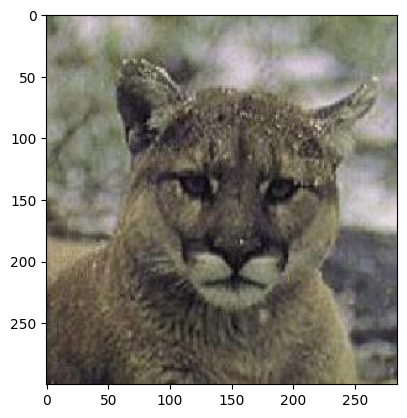

painting of a lobster with a red tail and a long tail 0.3261697292327881


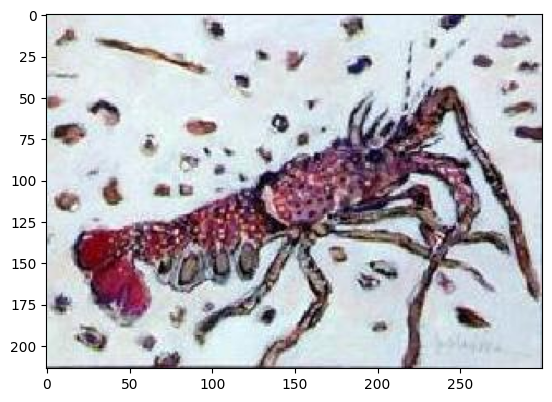

arafed sailboat with red sails in the ocean with a poem 0.3096921443939209


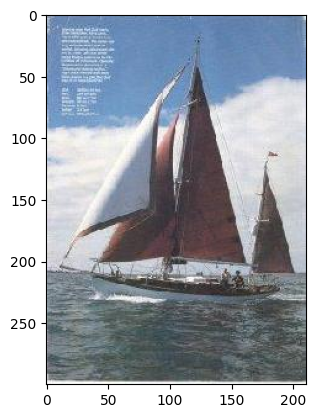

araffe bird with long beak and long legs standing on a white surface 0.2929614782333374


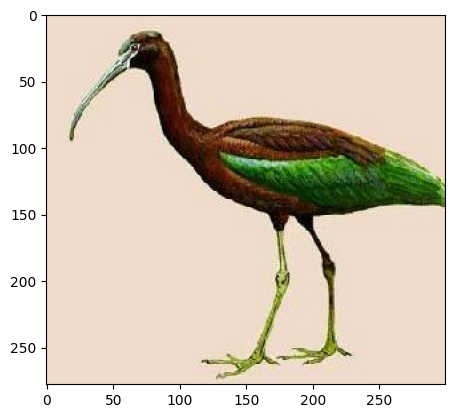

araffe sitting on a rock in a zoo looking at the camera 0.26599663496017456


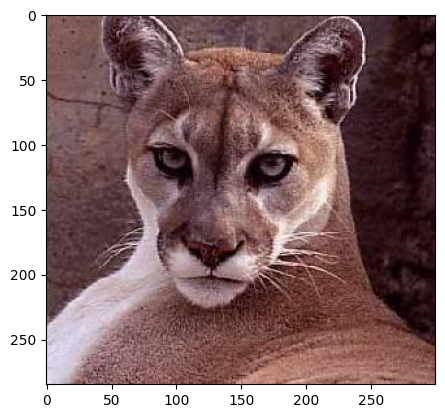

In [16]:
# Search for images
query = "cat"
results = embeddings.search(query, limit=5, index="dense")
results

# Display results
for result in results:
    print(result["text"], result["score"])
    img_path = captions[int(result["id"])]["image"]
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()